8 (72, 100) JPEG


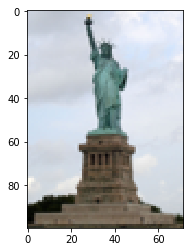

In [1]:
import os
from PIL import Image
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

path_to_img = os.path.join('..', 'datasets', 'statue_of_liberty.jpg')

target_size = (100, 100)

jpgfile = Image.open(path_to_img)
jpgfile.thumbnail(target_size)
imshow(jpgfile)
img_width, img_height = jpgfile.size
print(jpgfile.bits, jpgfile.size, jpgfile.format)

In [2]:
width, height = jpgfile.size
im = jpgfile.load()

In [3]:
im_dict = []
for h in range(height):
    for w in range(width):
        R, G, B = im[w, h]
        im_dict.append({'R': R, 'G': G, 'B': B})

In [4]:
img_df = pd.DataFrame(im_dict)[['R', 'G', 'B']]
img_df.head()

,R,G,B
0,203,210,222
1,205,211,222
2,203,209,220
3,204,209,218
4,202,208,218


In [5]:
from sklearn.cluster import KMeans
import numpy as np

ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(img_df)
    ss.append((i, kmeans.inertia_))


/anaconda3/envs/datafellow/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


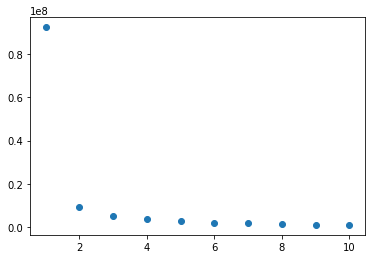

In [6]:
plt.scatter([x[0] for x in ss], [x[1] for x in ss])

In [7]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(img_df)
img_df = img_df.assign(**{'label': pd.Series(kmeans.labels_, index=img_df.index)})

In [8]:
import plotly
import plotly.graph_objs as go

import numpy as np

plotly.offline.init_notebook_mode(connected=True)

display_df = img_df

trace1 = go.Scatter3d(
    x=display_df['R'].values,
    y=display_df['G'].values,
    z=display_df['B'].values,
    mode='markers',
    marker=dict(
        size=1,
        color=display_df['label'].values,
        colorscale='Viridis',
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='simple-3d-scatter')

In [9]:
# Check whether green lebel is 0 or 1
non_green_df = img_df[img_df['label']==1]
mean_df = non_green_df[['R', 'G', 'B']].mean(axis=1)
for i in mean_df.index:
    img_df.loc[i, 'R'] = mean_df.loc[i]
    img_df.loc[i, 'G'] = mean_df.loc[i]
    img_df.loc[i, 'B'] = mean_df.loc[i]

In [10]:
import plotly
import plotly.graph_objs as go

import numpy as np

plotly.offline.init_notebook_mode(connected=True)

display_df = img_df

trace1 = go.Scatter3d(
    x=display_df['R'].values,
    y=display_df['G'].values,
    z=display_df['B'].values,
    mode='markers',
    marker=dict(
        size=1,
        color=display_df['label'].values,
        colorscale='Viridis',
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='simple-3d-scatter')

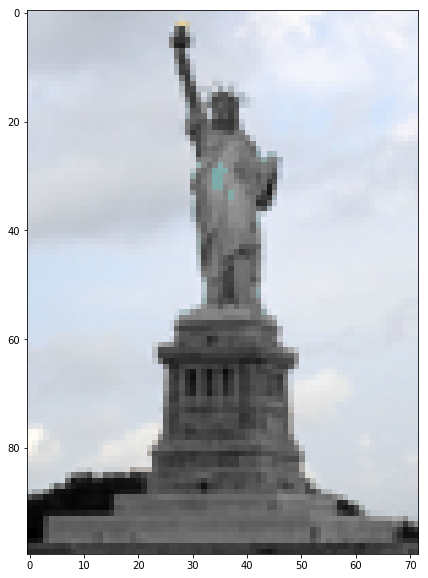

In [11]:
img_ary = {}
for color in ['R', 'G', 'B']:
    ary = img_df[color].values.reshape(img_height, img_width).astype('uint8')
    img_ary[color] = Image.fromarray(ary)
    
imrgb = Image.merge('RGB', list(img_ary.values()))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(imrgb)